### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
%matplotlib inline

### Đọc dữ liệu các bài posts, comments, reactors, sharers

In [2]:
post_df = pd.read_csv('data/vebay69/clean/posts_full.csv')
comment_df = pd.read_csv('data/vebay69/clean/comments_full.csv')
reactor_df = pd.read_csv('data/vebay69/clean/reactors_full.csv')
sharer_df = pd.read_csv('data/vebay69/clean/sharers_full.csv')

### Tổng quan về dữ liệu 

In [36]:
print('Posts: ', post_df.shape)
print('Comments: ', comment_df.shape)
print('Reactors: ', reactor_df.shape)
print('Shares: ', sharer_df.shape)

Posts:  (914, 36)
Comments:  (20986, 10)
Reactors:  (10807, 5)
Shares:  (18942, 4)


# Phân tích các bài posts

In [37]:
post_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        914 non-null    int64  
 1   post_text                      914 non-null    object 
 2   shared_text                    24 non-null     object 
 3   time                           914 non-null    object 
 4   image                          884 non-null    object 
 5   image_lowquality               914 non-null    object 
 6   images                         913 non-null    object 
 7   images_description             913 non-null    object 
 8   images_lowquality              914 non-null    object 
 9   images_lowquality_description  914 non-null    object 
 10  likes                          914 non-null    int64  
 11  comments                       914 non-null    int64  
 12  shares                         914 non-null    int

### Dữ liệu các bài post được lấy trong khoảng thời gian nào ?

In [38]:
post_df['time'].min(), post_df['time'].max()

('2022-05-06 07:37:28', '2023-11-22 03:43:11')

### Số admin của page và số bài post tương ứng

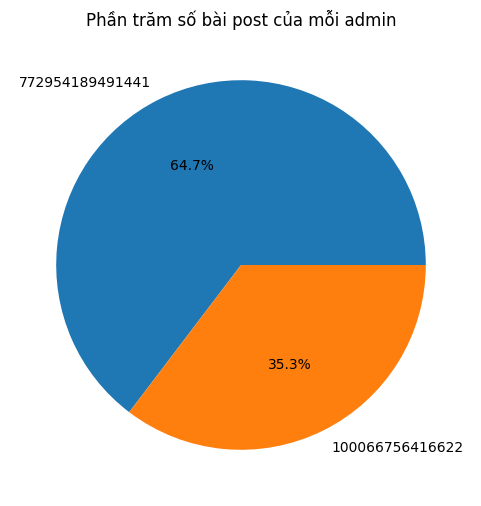

In [39]:
post_df['user_id'].value_counts().plot(kind='pie', figsize=(6, 6), title='Phần trăm số bài post của mỗi admin', autopct='%1.1f%%');
plt.ylabel('');

### Đâu là bài viết có lượt tương tác lớn nhất trong bộ dữ liệu ?

Top 5 post có nhiều lượt reaction nhất

In [40]:
top_5_max_reaction = post_df.nlargest(5, 'reaction_count')
top_5_max_reaction[['post_id', 'post_text', 'reaction_count', 'time']]

,post_id,post_text,reaction_count,time
711,5663428510443960,Ai chắc cũng đã từng\n,37754,2022-09-26 04:48:56
622,5854513741335435,Na Ế trải lòng\n,26723,2022-12-01 10:09:47
644,5808693772584099,Tin chuẩn chưa bro\n,26325,2022-11-15 03:55:23
662,5775707419216068,Nổ stk đê\n,24967,2022-11-03 10:30:35
423,6291401437646661,Nhưng mấy anh cứ giựt giựt ấy\n,24928,2023-04-21 03:34:58


In [41]:
top_5_min_reaction = post_df.nsmallest(5, 'reaction_count')
top_5_min_reaction[['post_id', 'post_text', 'reaction_count', 'time']]

,post_id,post_text,reaction_count,time
466,6238158042971001,Hy vọng mèo 2023 là mèo thần tài 😁,4,2023-04-03 06:00:02
465,6238625046257634,Này để chọc mấy người 1m8 à? 😁,7,2023-04-03 10:30:03
517,6150474095072730,Superhero này siuuuu :v,8,2023-03-05 10:30:03
470,6233068110146661,Ôi tuổi thơ 😂,10,2023-04-01 10:30:01
471,6232543603532445,Sao lại mang toàn thú cưng ra minh họa thế này? 😆,12,2023-04-01 06:00:01


In [42]:
col_type_int = ['reaction_count', 'comments', 'shares', 'like', 'love', 'haha', 'wow', 'care', 'sad', 'angry']

In [43]:
post_df[col_type_int].describe()

,reaction_count,comments,shares,like,love,haha,wow,care,sad,angry
count,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000
mean,5036.413567,279.619256,72.314004,3425.296499,19.171772,1505.170678,6.039387,5.094092,60.478118,0.574398
std,4477.265657,591.044327,961.069882,2854.457962,150.261065,1972.132574,45.601908,16.044227,229.268029,3.608655
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1968.500000,45.250000,7.000000,1303.000000,2.000000,322.500000,1.000000,1.000000,4.000000,0.000000
50%,3665.000000,99.000000,16.000000,2614.000000,5.000000,762.500000,3.000000,3.000000,14.000000,0.000000
75%,6650.000000,258.750000,40.000000,4601.750000,10.000000,1760.500000,6.000000,5.000000,45.000000,0.000000
max,37754.000000,7500.000000,29000.000000,21311.000000,4205.000000,14508.000000,1354.000000,333.000000,5041.000000,86.000000


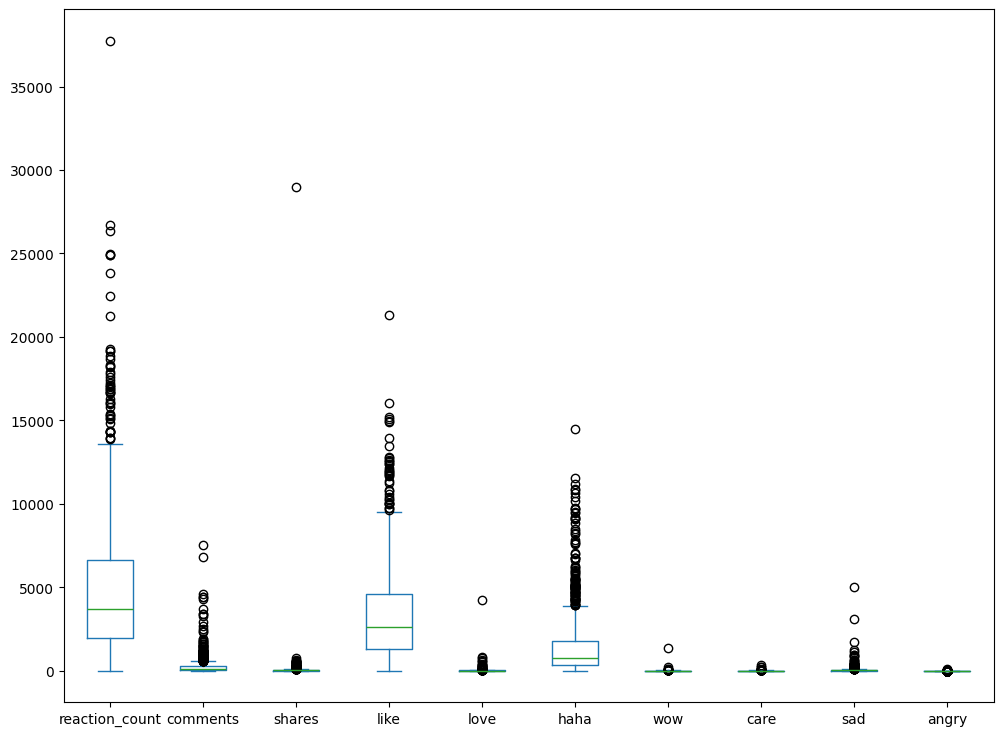

In [44]:
post_df[col_type_int].plot(kind='box', figsize=(12, 9));

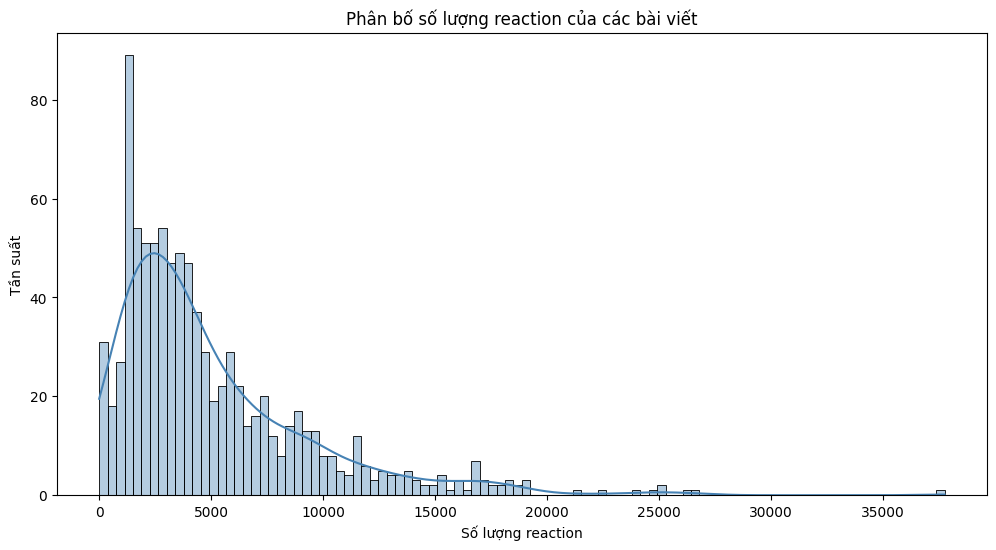

In [146]:
plt.figure(figsize=(12, 6));
sns.histplot(post_df['reaction_count'], bins=100, color='steelblue', edgecolor='black', kde=True, alpha=0.4);
plt.xlabel('Số lượng reaction')
plt.ylabel('Tần suất')
plt.title('Phân bố số lượng reaction của các bài viết');

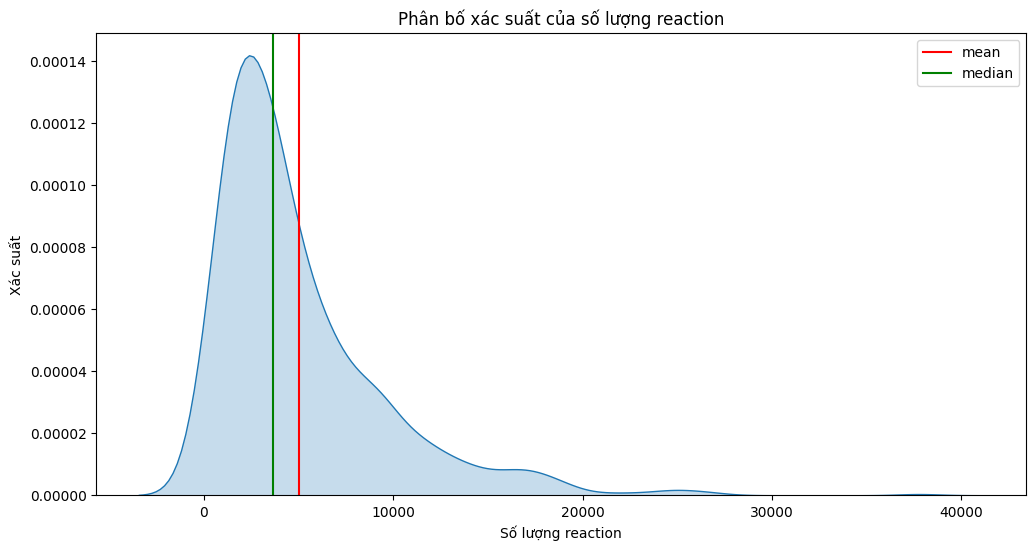

In [46]:
plt.figure(figsize=(12, 6));
sns.kdeplot(data=post_df['reaction_count'], fill=True)
plt.axvline(post_df['reaction_count'].mean(), color='red', label='mean')
plt.axvline(post_df['reaction_count'].median(), color='green', label='median')
plt.xlabel('Số lượng reaction')
plt.ylabel('Xác suất')
plt.legend()
plt.title('Phân bố xác suất của số lượng reaction');


### Thống kê bài đăng theo ngày trong tuần

In [47]:
weekdays = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
post_df['time'] = pd.to_datetime(post_df['time'])
post_df['weekday'] = post_df['time'].dt.weekday
posts_per_day_of_week = post_df['weekday'].value_counts().sort_index().rename(index=weekdays)
posts_per_day_of_week

weekday
Monday       154
Tuesday      135
Wednesday    151
Thursday     153
Friday       140
Saturday      96
Sunday        85
Name: count, dtype: int64

Số lượng posts theo ngày trong tuần

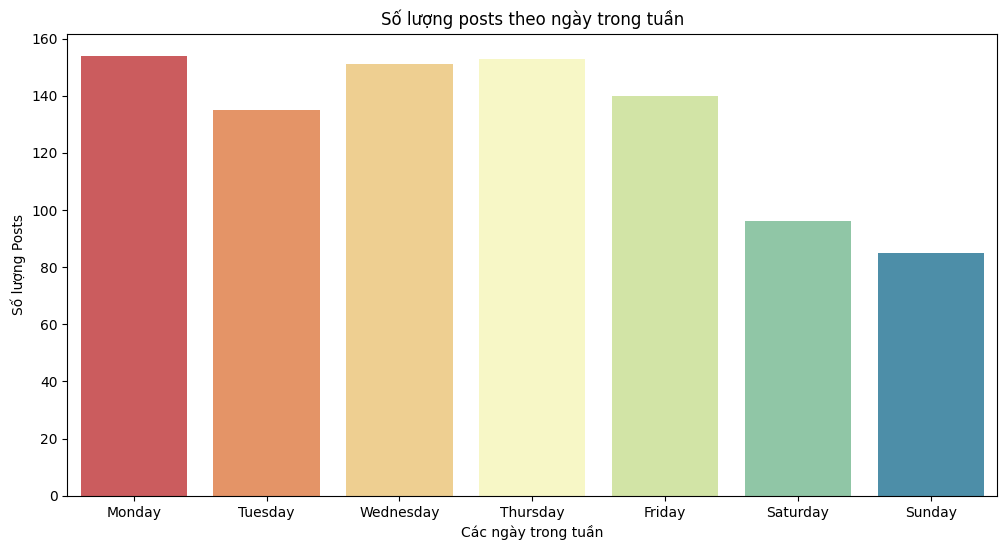

In [89]:
plt.figure(figsize=(12, 6));
# posts_per_day_of_week.plot(kind='bar', figsize=(15, 5), title='Số lượng posts theo ngày trong tuần')
sns.barplot(x=posts_per_day_of_week.index, y=posts_per_day_of_week.values, hue=posts_per_day_of_week.index, palette='Spectral')
plt.title('Số lượng posts theo ngày trong tuần')
plt.xlabel('Các ngày trong tuần')
plt.ylabel('Số lượng Posts');

In [49]:
avg_reaction_per_day_of_week = post_df.groupby('weekday')[['like', 'love', 'haha', 'wow', 'care', 'sad', 'angry']].mean().sort_index()
avg_reaction_per_day_of_week

,like,love,haha,wow,care,sad,angry
weekday,,,,,,,
0,3314.629870,12.941558,1281.272727,3.759740,5.844156,84.000000,0.811688
1,3664.948148,20.029630,1507.651852,6.014815,6.088889,57.237037,0.525926
2,3602.125828,11.721854,1626.251656,4.523179,4.728477,52.132450,0.271523
3,3830.705882,11.202614,1884.686275,4.784314,5.045752,86.633987,1.032680
4,3570.135714,49.492857,1848.457143,15.164286,4.907143,61.342857,0.650000
5,2799.364583,12.145833,1090.958333,3.510417,5.072917,29.885417,0.302083
6,2669.682353,14.670588,911.058824,2.988235,3.223529,23.882353,0.117647


Trung bình số lượng reaction theo ngày trong tuần

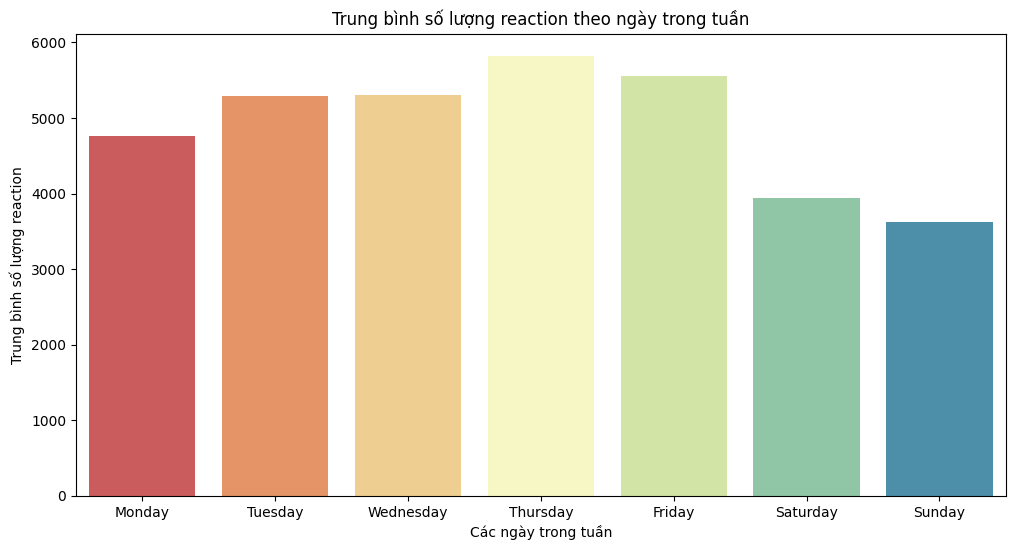

In [50]:
avg_reaction_per_day_of_week = post_df.groupby('weekday')['reaction_count'].mean().sort_index()
avg_reaction_per_day_of_week.rename(index=weekdays, inplace=True)
plt.figure(figsize=(12, 6));
sns.barplot(
    x=avg_reaction_per_day_of_week.index, 
    y=avg_reaction_per_day_of_week.values, 
    hue=avg_reaction_per_day_of_week.index, palette='Spectral', legend=False)
plt.title('Trung bình số lượng reaction theo ngày trong tuần')
plt.xlabel('Các ngày trong tuần')
plt.ylabel('Trung bình số lượng reaction');
plt.show()

Trung bình số lượng comment theo ngày trong tuần

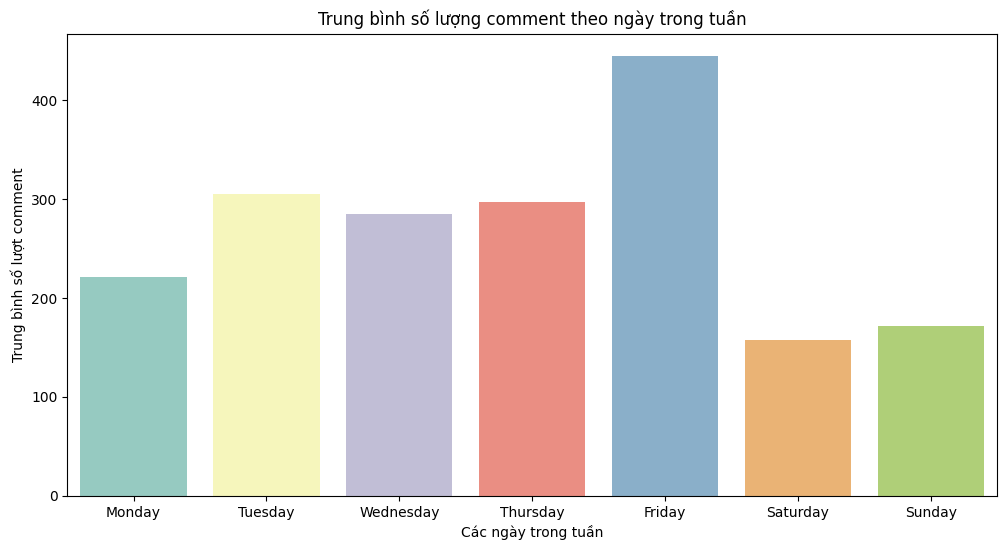

In [84]:
avg_comment_per_day_of_week = post_df.groupby('weekday')['comments'].mean().sort_index()
avg_comment_per_day_of_week.rename(index=weekdays, inplace=True)
plt.figure(figsize=(12, 6));
sns.barplot(
    x=avg_comment_per_day_of_week.index, 
    y=avg_comment_per_day_of_week.values, 
    hue=avg_comment_per_day_of_week.index, palette='Spectral', legend=False);
plt.title('Trung bình số lượng comment theo ngày trong tuần')
plt.xlabel('Các ngày trong tuần')
plt.ylabel('Trung bình số lượt comment');

Trung bình số lượng share mỗi ngày trong tuần

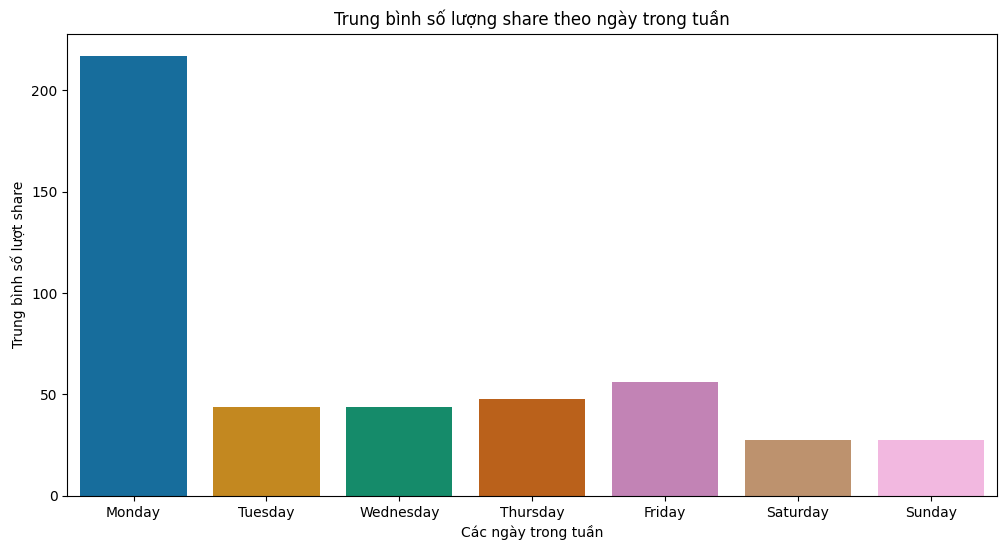

In [85]:
avg_share_per_day_of_week = post_df.groupby('weekday')['shares'].mean().sort_index()
avg_share_per_day_of_week.rename(index=weekdays, inplace=True)
plt.figure(figsize=(12, 6));
sns.barplot(
    x=avg_share_per_day_of_week.index, 
    y=avg_share_per_day_of_week.values, 
    hue=avg_share_per_day_of_week.index, palette='Spectral', legend=False);
plt.title('Trung bình số lượng share theo ngày trong tuần')
plt.xlabel('Các ngày trong tuần')
plt.ylabel('Trung bình số lượt share');

### Thống kê bài đăng theo khung giờ đăng bài
Các mốc thời gian trong ngày mà Fanpage thường xuyên đăng bài. Sự hiệu quả khi đăng bài vào các khung giờ trên

Số lượng bài đăng theo các khung giờ trong 1 ngày

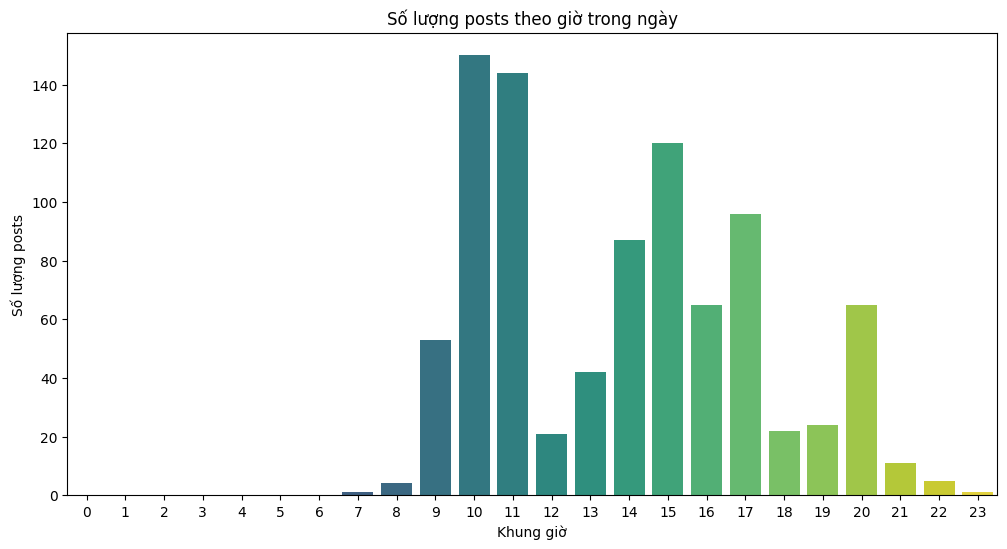

In [78]:
# Convert to hour
post_df['hour'] = post_df['time'].dt.hour + 7
# Count number of posts per hour
posts_per_hour = post_df['hour'].value_counts().sort_index()
# Fill missing hours with 0
all_hours = pd.Index(range(24))
posts_per_hour = posts_per_hour.reindex(all_hours, fill_value=0)
plt.figure(figsize=(12, 6));
sns.barplot(x=posts_per_hour.index, y=posts_per_hour.values, hue=posts_per_hour.index, palette='viridis', legend=False)
plt.title('Số lượng posts theo giờ trong ngày')
plt.ylabel('Số lượng posts')
plt.xlabel('Khung giờ');

Trung bình số lượng reaction theo giờ trong ngày

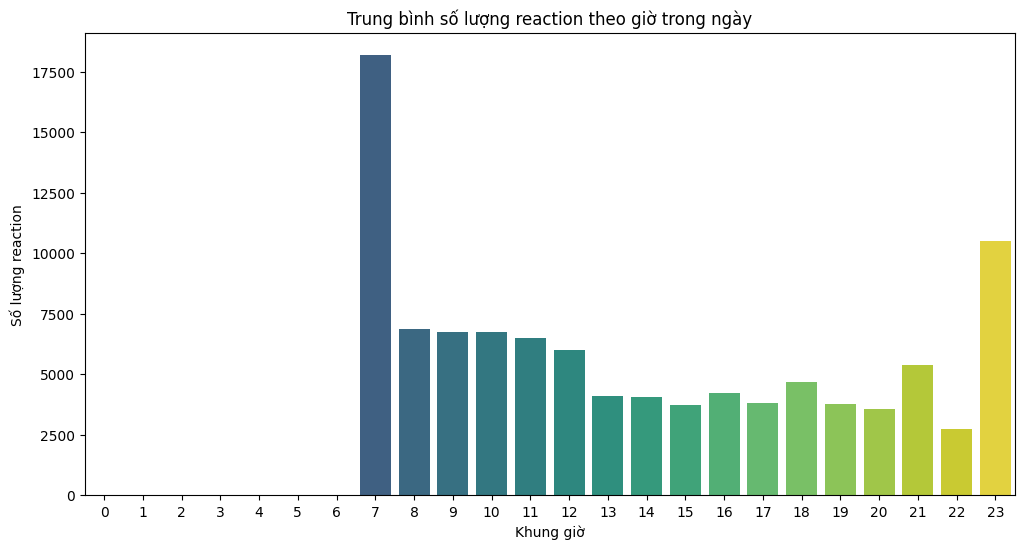

In [79]:
avg_reaction_per_hour = post_df.groupby('hour')['reaction_count'].mean().sort_index()
avg_reaction_per_hour = avg_reaction_per_hour.reindex(all_hours, fill_value=0)
plt.figure(figsize=(12, 6));
sns.barplot(x=avg_reaction_per_hour.index, y=avg_reaction_per_hour.values, hue=avg_reaction_per_hour.index, palette='viridis', legend=False)
plt.title('Trung bình số lượng reaction theo giờ trong ngày')
plt.ylabel('Số lượng reaction')
plt.xlabel('Khung giờ');

Trung bình số lượng comment theo giờ trong ngày

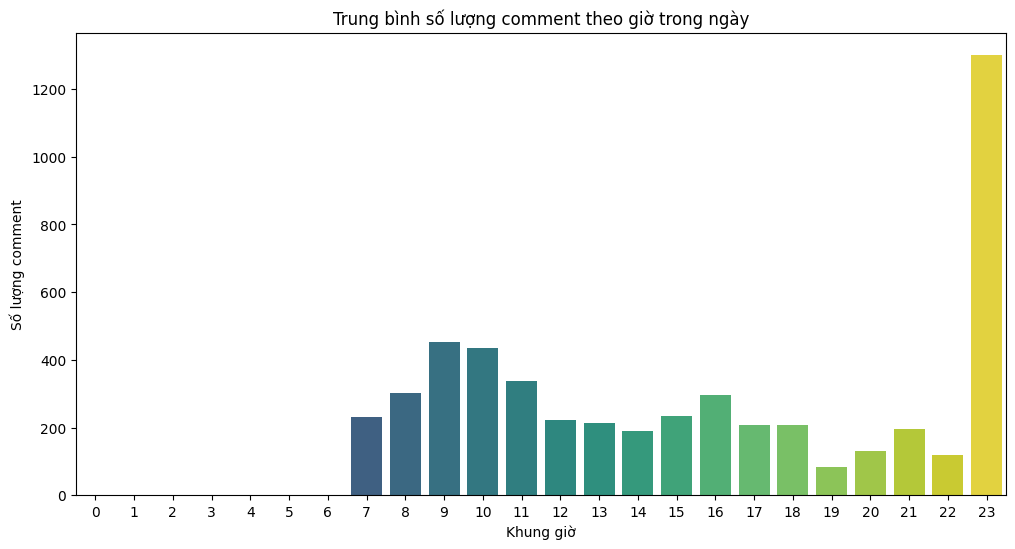

In [80]:
avg_comment_per_hour = post_df.groupby('hour')['comments'].mean().sort_index()
avg_comment_per_hour = avg_comment_per_hour.reindex(all_hours, fill_value=0)
plt.figure(figsize=(12, 6));
sns.barplot(x=avg_comment_per_hour.index, y=avg_comment_per_hour.values, hue=avg_comment_per_hour.index, palette='viridis', legend=False)
plt.title('Trung bình số lượng comment theo giờ trong ngày')
plt.ylabel('Số lượng comment')
plt.xlabel('Khung giờ');

Trung bình số lượt share theo giờ trong ngày

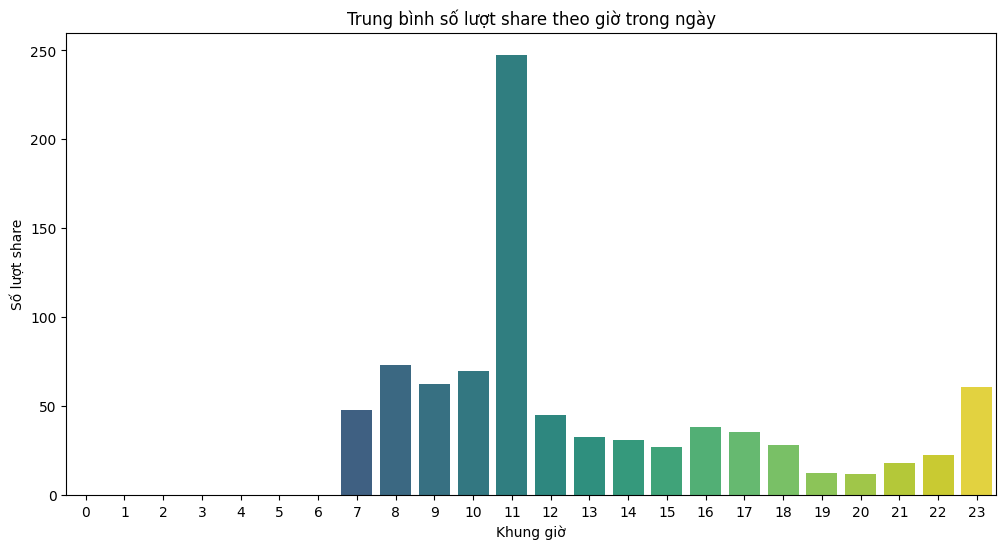

In [81]:
avg_share_per_hour = post_df.groupby('hour')['shares'].mean().sort_index()
avg_share_per_hour = avg_share_per_hour.reindex(all_hours, fill_value=0)
plt.figure(figsize=(12, 6));
sns.barplot(x=avg_share_per_hour.index, y=avg_share_per_hour.values, hue=avg_share_per_hour.index, palette='viridis', legend=False)
plt.title('Trung bình số lượt share theo giờ trong ngày')
plt.ylabel('Số lượt share')
plt.xlabel('Khung giờ');

### Sự thay đổi của số lượt reactions theo thời gian

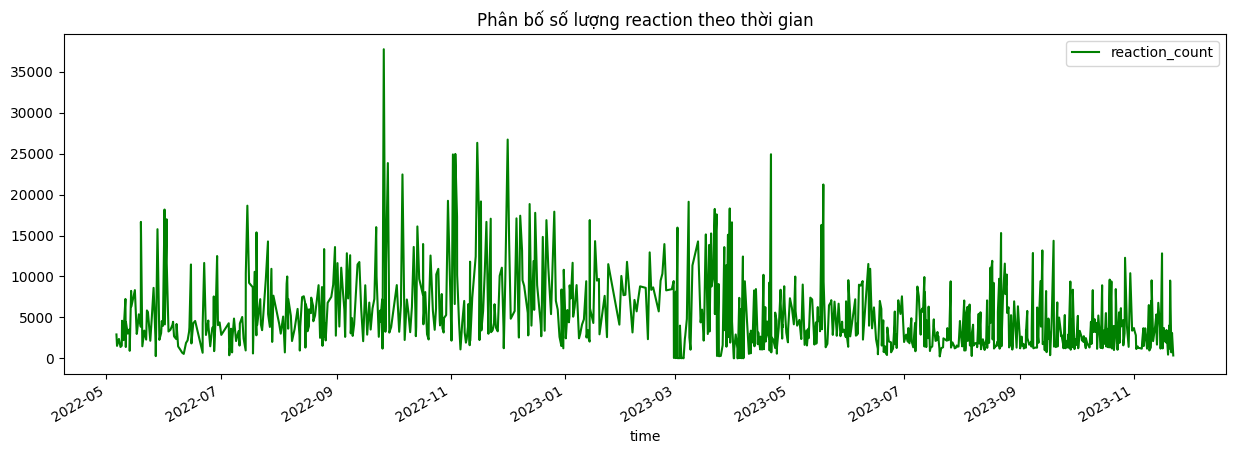

In [54]:
post_df.plot(x='time', y='reaction_count', figsize=(15, 5), title='Phân bố số lượng reaction theo thời gian', color='green');

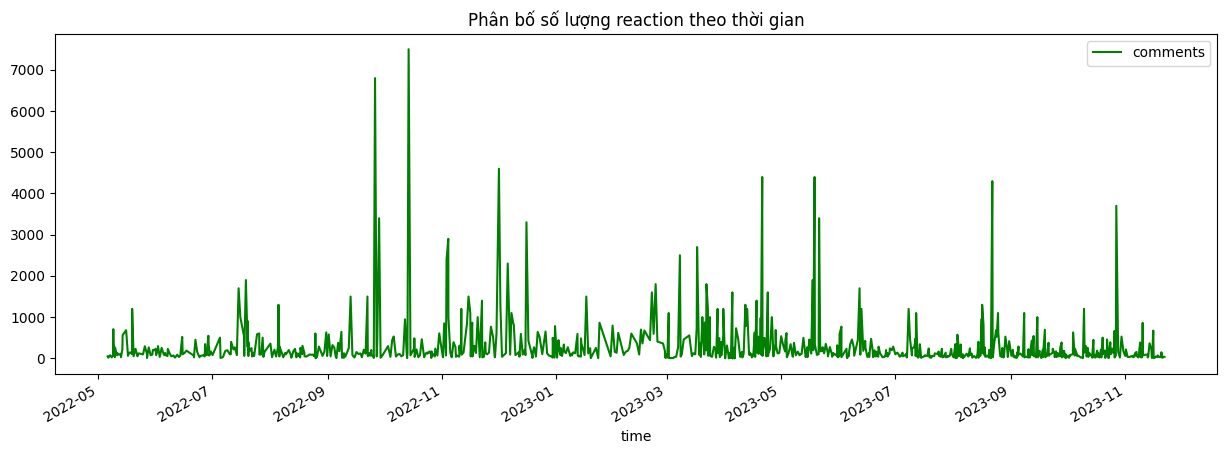

In [108]:
post_df.plot(x='time', y='comments', figsize=(15, 5), title='Phân bố số lượng comment theo thời gian', color='green');

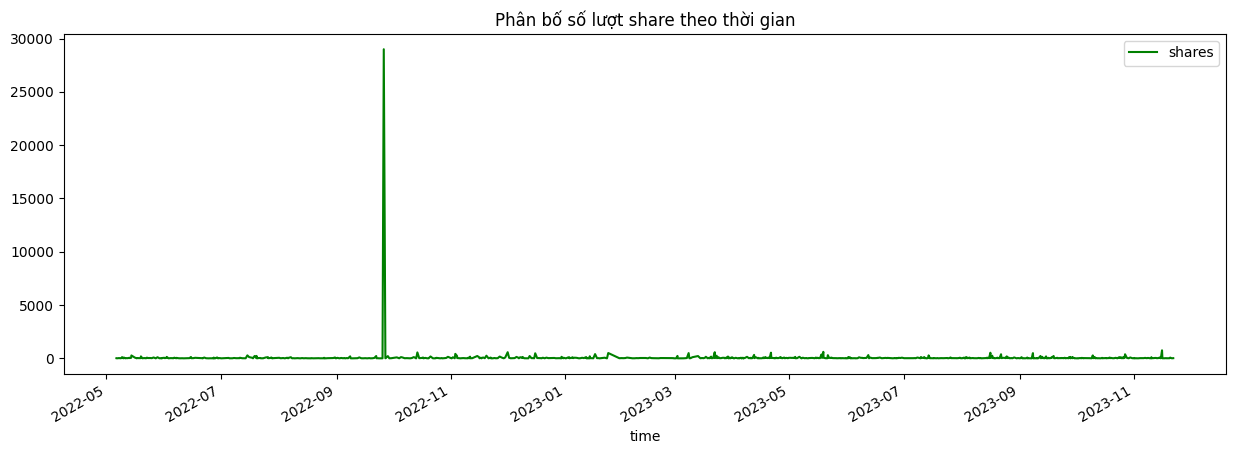

In [109]:
post_df.plot(x='time', y='shares', figsize=(15, 5), title='Phân bố số lượt share theo thời gian', color='green');

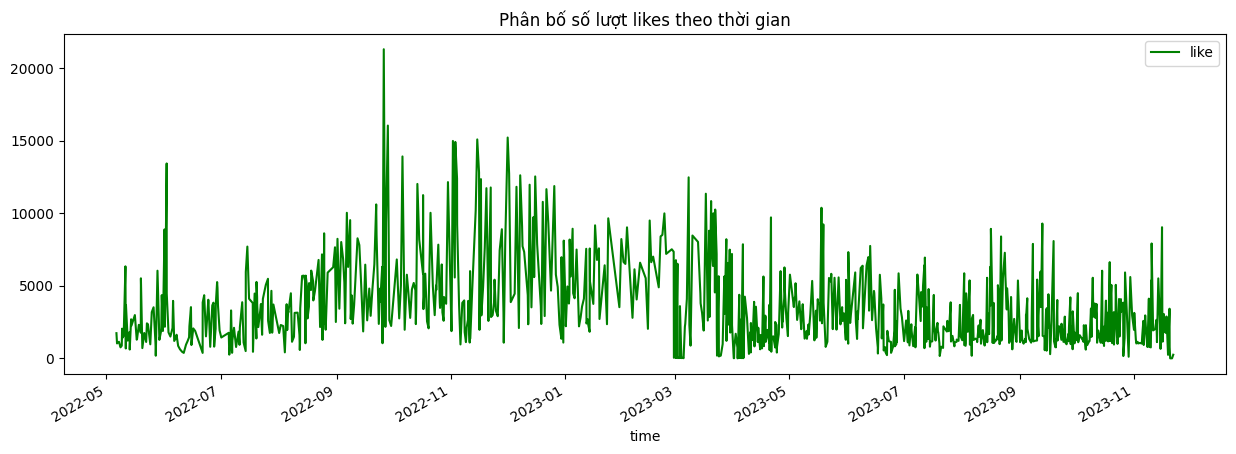

In [113]:
post_df.plot(x='time', y='like', figsize=(15, 5), title='Phân bố số lượt likes theo thời gian', color='green');

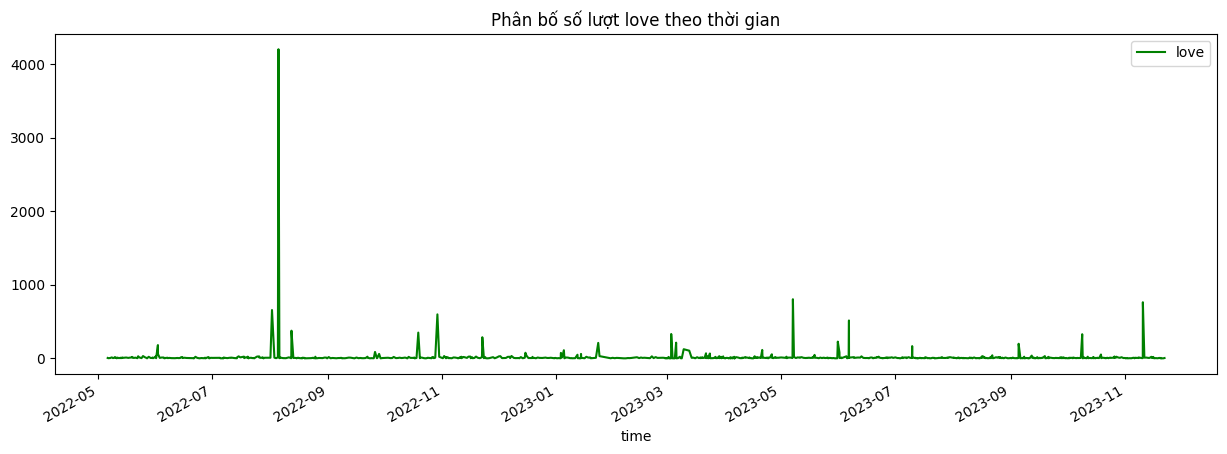

In [115]:
post_df.plot(x='time', y='love', figsize=(15, 5), title='Phân bố số lượt love theo thời gian', color='green');

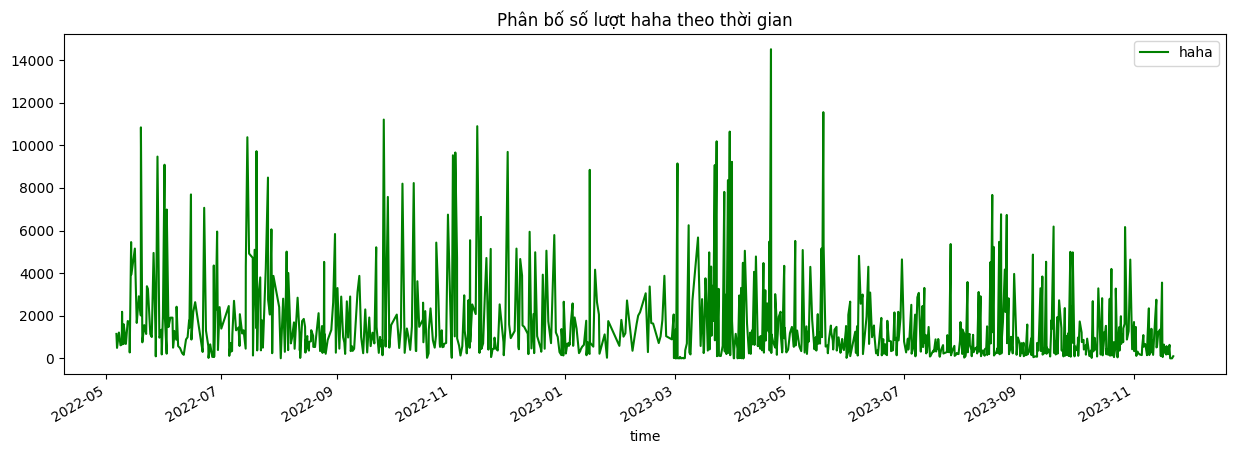

In [116]:
post_df.plot(x='time', y='haha', figsize=(15, 5), title='Phân bố số lượt haha theo thời gian', color='green');

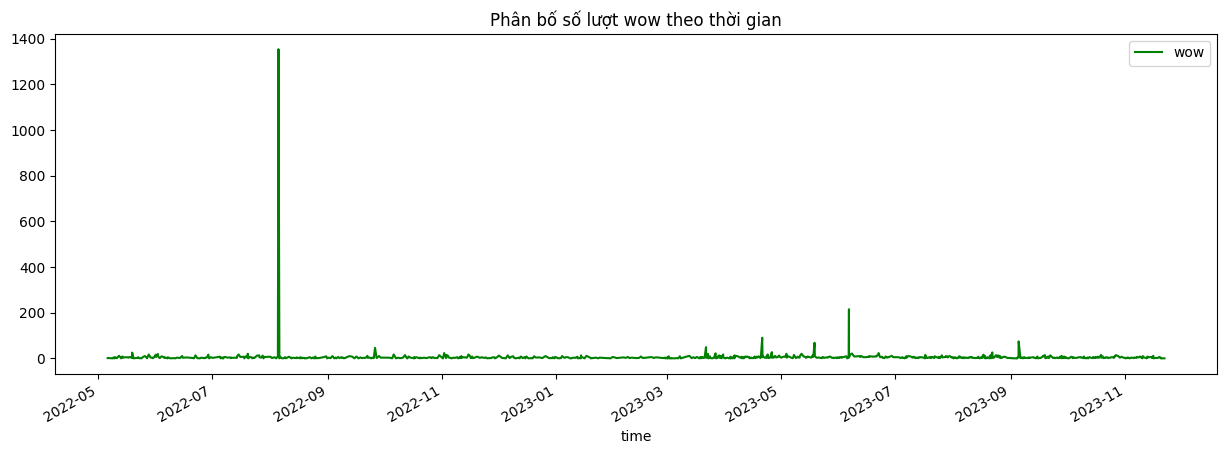

In [117]:
post_df.plot(x='time', y='wow', figsize=(15, 5), title='Phân bố số lượt wow theo thời gian', color='green');

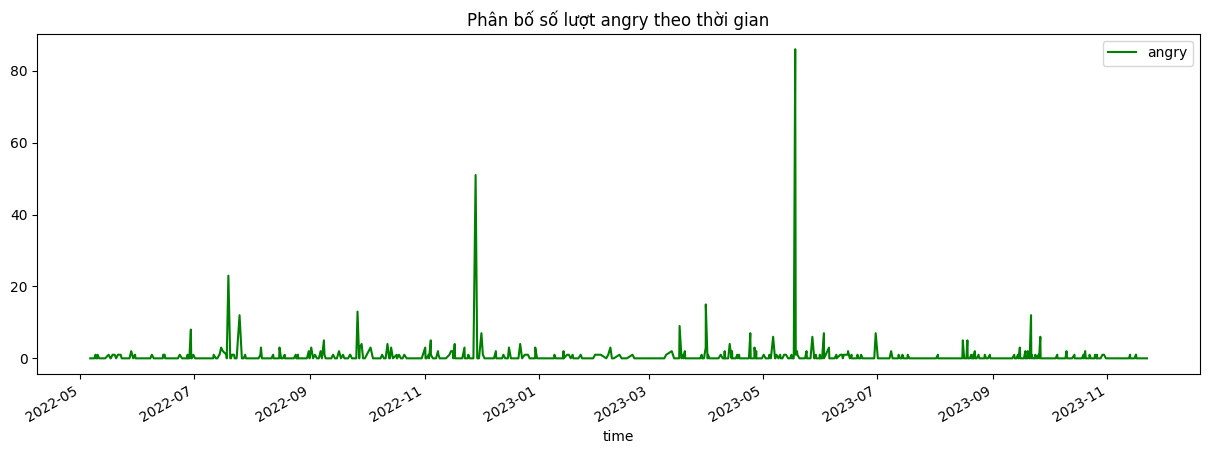

In [118]:
post_df.plot(x='time', y='angry', figsize=(15, 5), title='Phân bố số lượt angry theo thời gian', color='green');

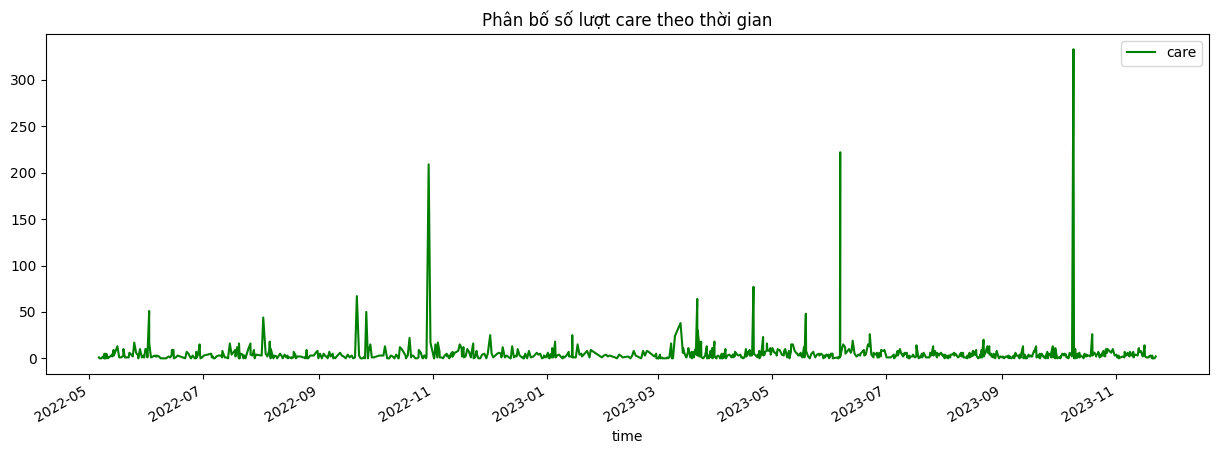

In [119]:
post_df.plot(x='time', y='care', figsize=(15, 5), title='Phân bố số lượt care theo thời gian', color='green');

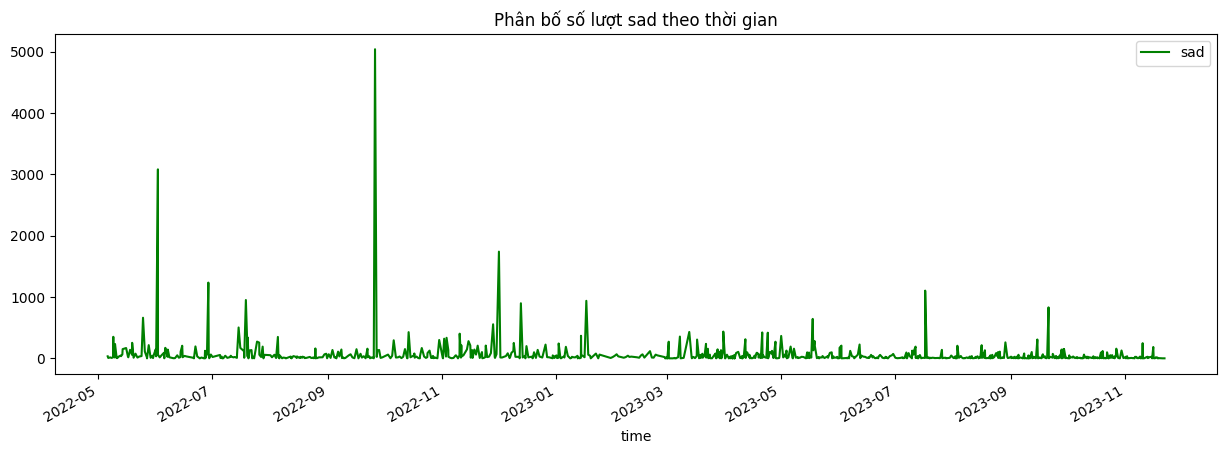

In [120]:
post_df.plot(x='time', y='sad', figsize=(15, 5), title='Phân bố số lượt sad theo thời gian', color='green');

### Sự tương quan giữa số lượng reactions với các trường khác như số lượng bình luận, độ dài bài viết, số lượt share, comment

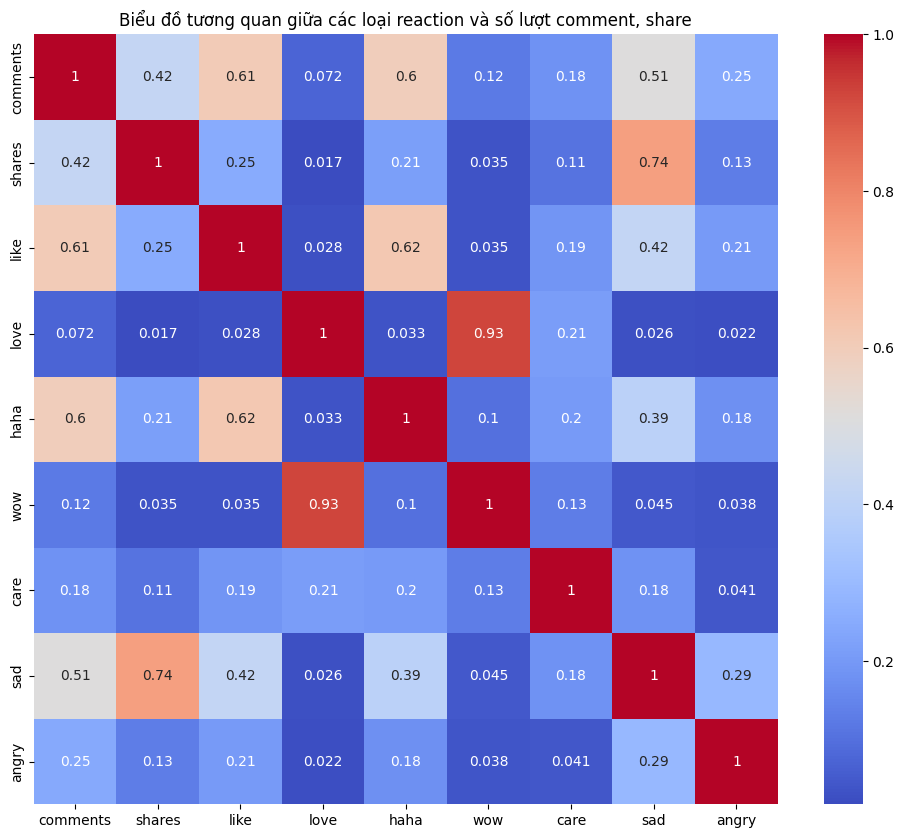

In [97]:
corr_matrix = post_df[['comments', 'shares', 'like', 'love', 'haha', 'wow', 'care', 'sad', 'angry']].corr()
plt.figure(figsize=(12, 10));
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Biểu đồ tương quan giữa các loại reaction và số lượt comment, share');

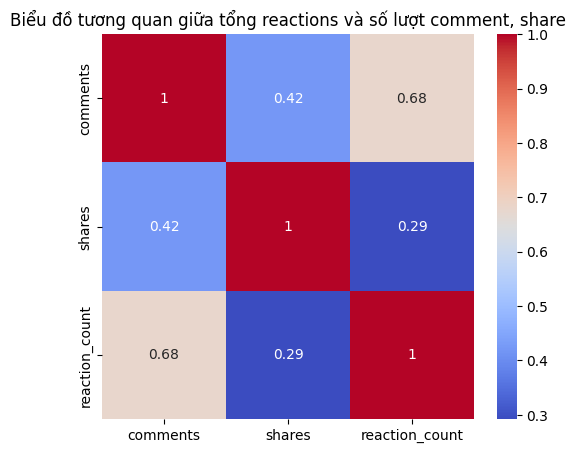

In [104]:
corr_matrix = post_df[['comments', 'shares', 'reaction_count']].corr()
plt.figure(figsize=(6, 5));
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Biểu đồ tương quan giữa tổng reactions và số lượt comment, share');

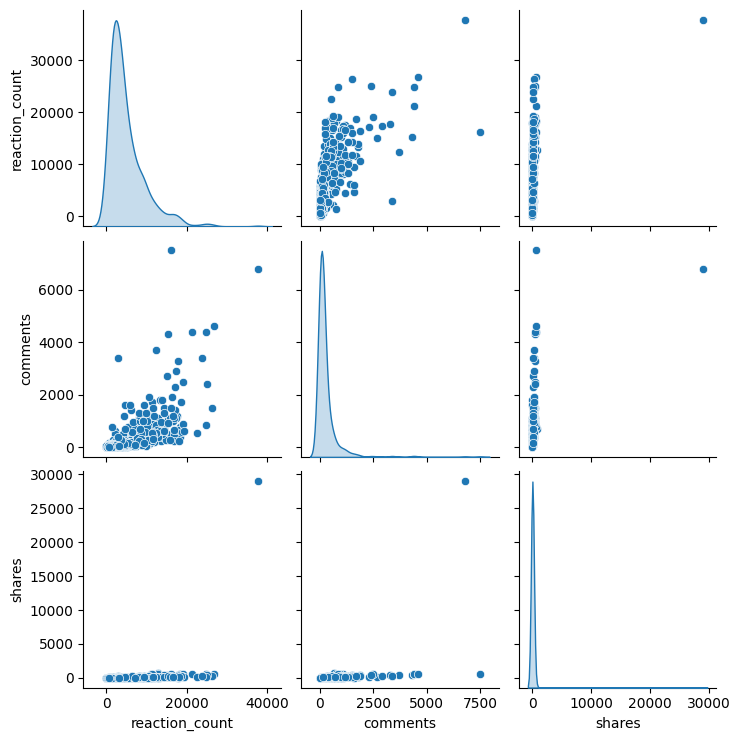

In [107]:
sns.pairplot(post_df[['reaction_count', 'comments', 'shares']], diag_kind='kde');

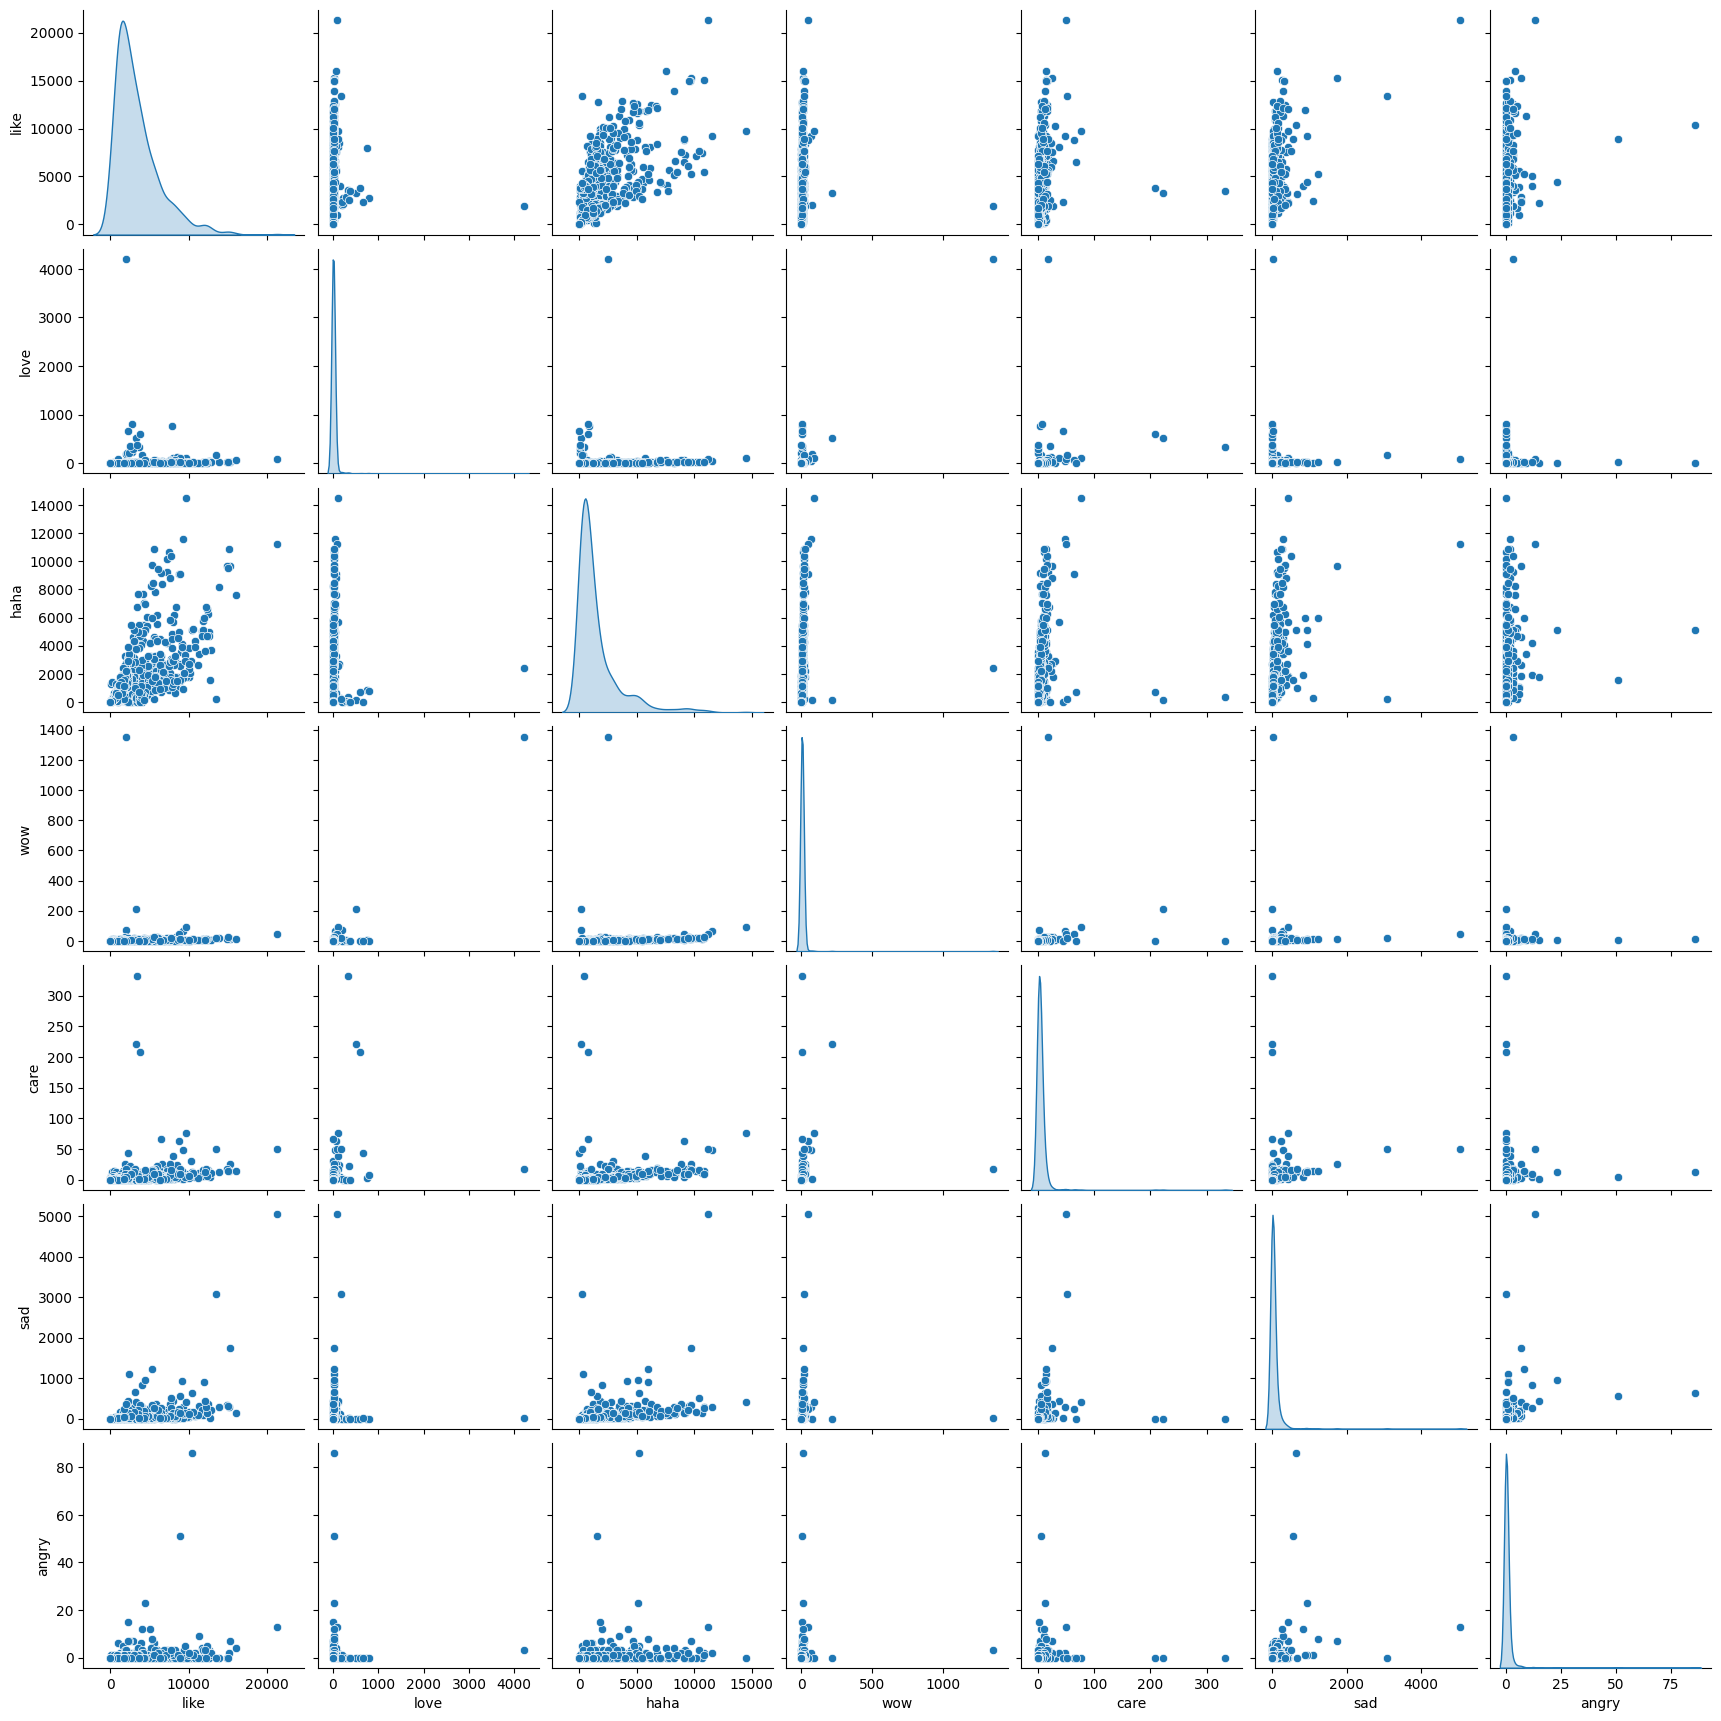

In [147]:
sns.pairplot(post_df[['like', 'love', 'haha', 'wow', 'care', 'sad', 'angry']], diag_kind='kde');

### Đâu là các từ khóa xuất hiện nhiều nhất trong các bài đăng được thu thập?

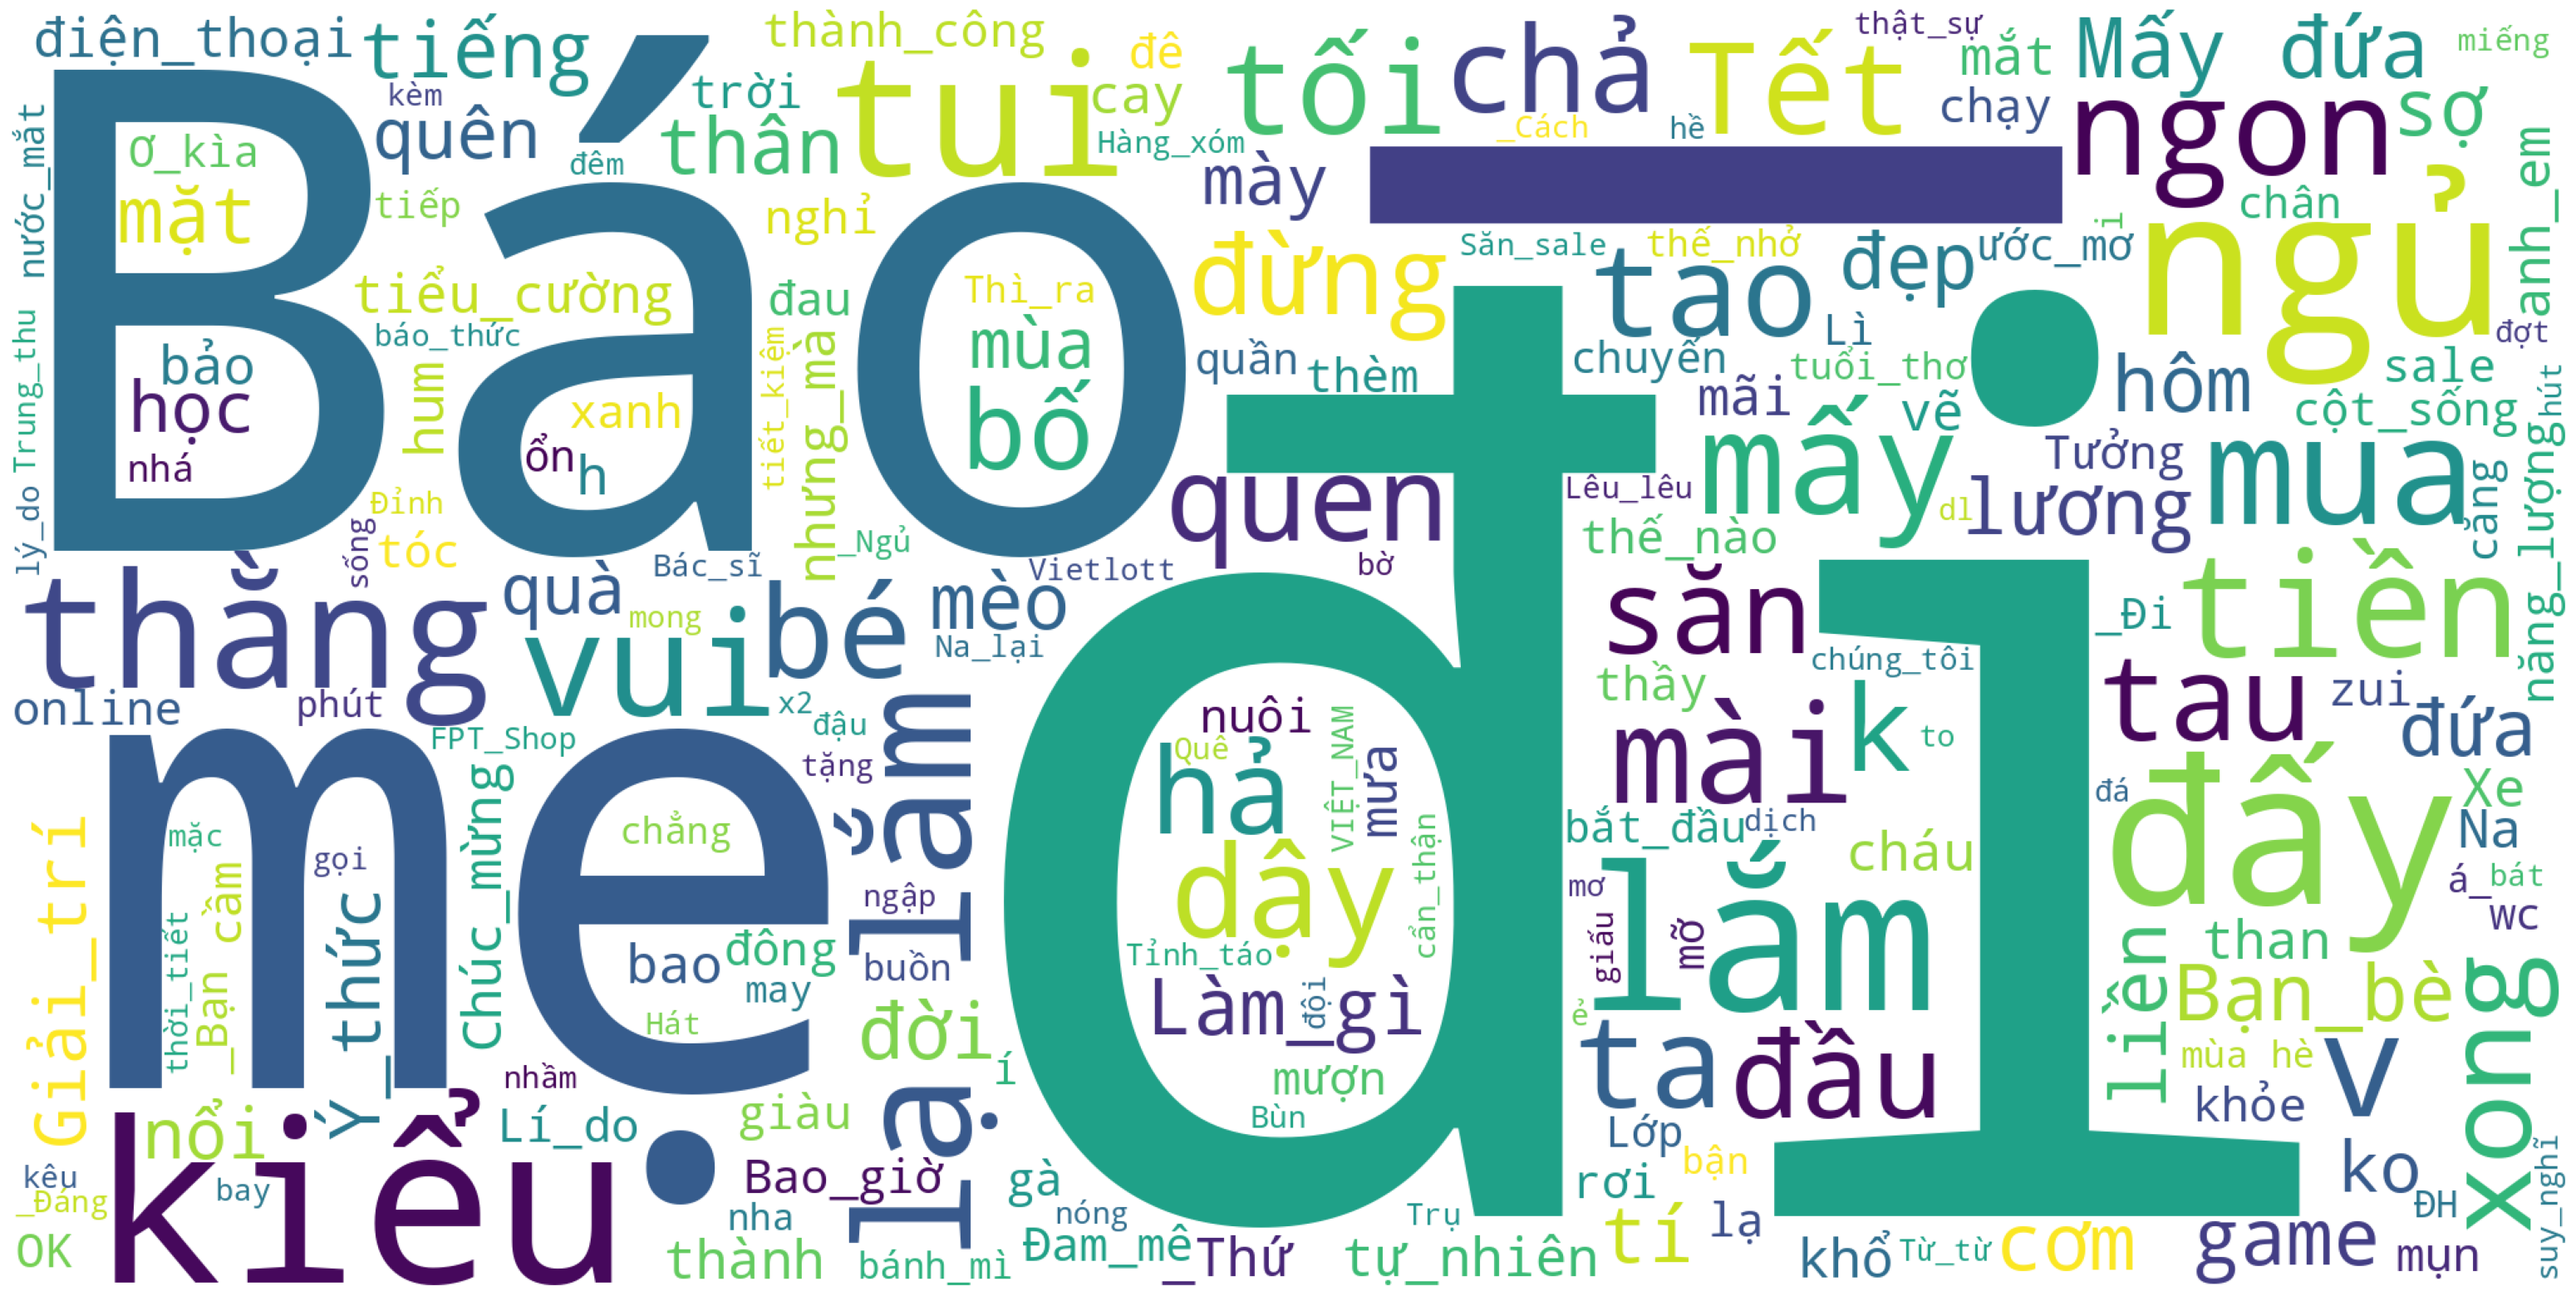

In [55]:
from wordcloud import WordCloud
from underthesea import word_tokenize, classify

# Danh sách các stopwords Tiếng Việt
stopwords = set(open('data/other/vietnamese-stopwords.txt', mode='r', encoding='utf-8').read().splitlines())

# Tokenize text
post_text = ' '.join(post_df['post_text'])
post_text = word_tokenize(post_text, format='text')

wordcloud = WordCloud(
    stopwords=stopwords, 
    background_color='white', 
    width=2000, 
    height=1000).generate(post_text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Phân tích comments

In [56]:
comment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20986 entries, 0 to 20985
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   comment_id      20986 non-null  int64 
 1   comment_url     20986 non-null  object
 2   commenter_id    20986 non-null  int64 
 3   commenter_url   20986 non-null  object
 4   commenter_name  20986 non-null  object
 5   commenter_meta  645 non-null    object
 6   comment_text    20986 non-null  object
 7   comment_time    20986 non-null  object
 8   comment_image   9564 non-null   object
 9   post_id         20986 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 1.6+ MB


In [57]:
comment_df.head()

,comment_id,comment_url,commenter_id,commenter_url,commenter_name,commenter_meta,comment_text,comment_time,comment_image,post_id
0,7293325574033680,https://facebook.com/7293325574033680,100003612977695,https://facebook.com/profile.php?id=1000036129...,Duy Mạnh,NaN,Nguyễn Quỳnh Chi kìa 🙄🙄,2023-10-25,NaN,674847581417116
1,749393307230801,https://facebook.com/749393307230801,100013343568769,https://facebook.com/chit.htoo.581730?eav=AfZN...,Cậu Cuối Hằng,NaN,Duy Mạnh 🥀Có group này cho kèo bóng hay dã man...,2023-11-04,https://scontent-sin6-4.xx.fbcdn.net/v/t39.308...,674847581417116
2,1487108768797715,https://facebook.com/1487108768797715,100007184865648,https://facebook.com/thuantopp1904?eav=AfZ3iiR...,Đặng Thị Thuận Topp,NaN,Wo mần,2023-11-04,NaN,674847581417116
3,2324054461101038,https://facebook.com/2324054461101038,100003282592038,https://facebook.com/nhokvjz?eav=AfbauFXsyN4Kr...,Đức Anh,Top fan,:)),2023-10-25,NaN,674847581417116
4,869000111296727,https://facebook.com/869000111296727,1004645836,https://facebook.com/linh.hon.10?eav=AfZg22cKU...,Linh Trieu,NaN,Nam Anh,2023-10-25,NaN,674847581417116


### Dữ liệu comment của bao nhiêu bài post khác nhau

In [58]:
len(comment_df['post_id'].unique())

164

### Đếm số lượng comments đã crawl trong bộ data về comments và so sánh với số lượng thực tế

In [59]:
post_comment_df = pd.DataFrame(comment_df.groupby('post_id')['comment_id'].count().sort_values(ascending=False).rename('crawled_comments'))
post_comment_df['actual_comments'] = [post_df.loc[post_df['post_id'] == x, 'comments'].values[0] for x in post_comment_df.index]
post_comment_df

,crawled_comments,actual_comments
post_id,,
673396338228907,3295,3700
663706615864546,1161,1200
646578170910724,1008,1100
650376223864252,900,1000
680567950845079,729,861
...,...,...
658680386367169,2,2
672887991613075,1,20
674391788129362,1,19


### Bài post có nhiều comment nhất trong bộ dữ liệu comments

In [60]:
max_comment_id = comment_df['post_id'].value_counts().nlargest(1)
print(max_comment_id)

post_id
673396338228907    3295
Name: count, dtype: int64


So sánh với số lượng comments thực tế

In [61]:
post_df[post_df['post_id'] == max_comment_id.index[0]]

,post_id,post_text,shared_text,time,image,image_lowquality,images,images_description,images_lowquality,images_lowquality_description,likes,comments,shares,link,links,user_id,shared_post_id,shared_time,shared_user_id,shared_username,shared_post_url,comments_full,reactors,w3_fb_url,reaction_count,with,image_id,image_ids,fetched_time,like,love,haha,wow,care,sad,angry,weekday,hour
48,673396338228907,Đồng báo\n,NaN,2023-10-27 09:20:56,https://scontent-sin6-2.xx.fbcdn.net/v/t39.308...,https://scontent-sin6-2.xx.fbcdn.net/v/t39.308...,['https://scontent-sin6-2.xx.fbcdn.net/v/t39.3...,"[""May be an image of text that says 'Đồng vợ Đ...",['https://scontent-sin6-2.xx.fbcdn.net/v/t39.3...,"[""May be an image of text that says 'Đồng vợ Đ...",5921,3700,381,NaN,[{'link': '/hashtag/muonggg?_ft_=encrypted_tra...,100066756416622,NaN,NaN,NaN,NaN,NaN,NaN,[],https://www.facebook.com/vebay69/posts/6733963...,12285,NaN,6.733961e+14,['673396101562264'],2023-11-20 08:10:57.657097,5921,22,6162,13,10,157,0,4,16


### Tìm các top fan và số lượng comments của họ

In [62]:
comment_df.loc[comment_df['commenter_meta'] == 'Top fan']['commenter_id'].value_counts()

commenter_id
100003268778639    29
100013000489006    27
100004238532113    16
100003282592038     7
100017830726873     7
                   ..
100014297553936     1
100025098080817     1
694449589           1
100003334200442     1
100004619324133     1
Name: count, Length: 307, dtype: int64

### Tìm các comment của chính tác giả

In [63]:
comment_df.loc[comment_df['commenter_meta'] == 'Author']['commenter_id'].value_counts()

commenter_id
100066756416622    13
Name: count, dtype: int64

In [64]:
comment_df.loc[comment_df['commenter_id'] == 100066756416622]

,comment_id,comment_url,commenter_id,commenter_url,commenter_name,commenter_meta,comment_text,comment_time,comment_image,post_id
5898,995876434863439,https://facebook.com/995876434863439,100066756416622,https://facebook.com/vebay69?eav=AfaVxWEMW_Lq6...,Vẽ bậy,Author,xem ngay chi tiết tại đây nhá: https://\nfb.wa...,2023-10-02 21:00:00,https://scontent-xsp2-1.xx.fbcdn.net/v/t15.525...,664376219130919
7206,714727366767598,https://facebook.com/714727366767598,100066756416622,https://facebook.com/vebay69?eav=AfbN-8dpkSHcZ...,Vẽ bậy,Author,Thay nhớt Castrol thì phải nhớ quét mã nha mấy...,2023-11-04,https://www.khuyenmaicastrol.com/?fbclid=IwAR0...,675981387970402
7945,647093924161311,https://facebook.com/647093924161311,100066756416622,https://facebook.com/vebay69?eav=AfYPoRAo2zKns...,Vẽ bậy,Author,Những ánh mắt thất thần,2023-10-25,https://scontent-xsp1-1.xx.fbcdn.net/v/t39.308...,666766752225199
7946,1260112434677681,https://facebook.com/1260112434677681,100066756416622,https://facebook.com/vebay69?eav=AfYPoRAo2zKns...,Vẽ bậy,Author,Những nụ cười ngờ nghệch,2023-10-25,https://scontent-xsp1-1.xx.fbcdn.net/v/t39.308...,666766752225199
8768,289029053884507,https://facebook.com/289029053884507,100066756416622,https://facebook.com/vebay69?eav=AfZz0dNgG_I3V...,Vẽ bậy,Author,Hợp lí...,2023-09-27,https://scontent-sin6-4.xx.fbcdn.net/v/t39.308...,654884110080130
12810,666345755678627,https://facebook.com/666345755678627,100066756416622,https://facebook.com/vebay69?eav=Afb2BQ1ObBzLJ...,Vẽ bậy,Author,Vào giựt voucher khủng và săn deal sập sàn từ ...,2023-11-10,https://www.tiktok.com/@tiktokshoplive.VN?fbcl...,680652457503295
12822,980460173051615,https://facebook.com/980460173051615,100066756416622,https://facebook.com/vebay69?eav=AfaZ29bzpQBHG...,Vẽ bậy,Author,Vào ngay đây săn deal chốt đơn nhé anh em: htt...,2023-11-10,https://s.lazada.vn/l.Fggx?fbclid=IwAR0TPRHHIH...,680491620852712
14444,1386579585574980,https://facebook.com/1386579585574980,100066756416622,https://facebook.com/vebay69?eav=AfaW59Q5JTRDj...,Vẽ bậy,Author,Na tức mà Na không nói… được,2023-11-19,https://scontent-sin6-3.xx.fbcdn.net/v/t39.308...,685111467057394
17177,616870163896456,https://facebook.com/616870163896456,100066756416622,https://facebook.com/vebay69?eav=AfbJ2I1h9CkJF...,Vẽ bậy,Author,LazFlash Max đã giảm nhiều mà còn trợ giá tới ...,2023-08-28,https://s.lazada.vn/l.ugHw?fbclid=IwAR0J1JdRlu...,646251794276695
18256,282387351229067,https://facebook.com/282387351229067,100066756416622,https://facebook.com/vebay69?eav=AfYufyZuxU6rk...,Vẽ bậy,Author,Ý Lì là bánh này đúng ko? 🥹,2023-09-27,https://scontent-sin6-4.xx.fbcdn.net/v/t39.308...,656522673249607
